<a href="https://colab.research.google.com/github/IsaMoral/FullOrderObserver/blob/main/07Observers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy import signal
from numpy.linalg import matrix_rank
import control as ctrl

# Definir los polos de la planta
poles = [-15,-6]

# Calcular la función de transferencia de la planta
num = [1]
den = np.poly(poles)
sys_c = signal.TransferFunction(num, den)

# Calcular el modelo de espacio de estados
A, B, C, D = signal.tf2ss(num, den)

# Calcular el modelo discreto con ZOH
Ts = 0.1  # Periodo de muestreo
sys_d = signal.cont2discrete((A, B, C, D), Ts, method='zoh')

# Imprimir el modelo de espacio de estados
print("Modelo de Espacio de Estados (Continuo):")
print("A = ", A)
print("B = ", B)
print("C = ", C)
print("D = ", D)

# Imprimir el modelo discreto
print("\nModelo Discreto (ZOH):")
print("A = ", sys_d[0])
print("B = ", sys_d[1])
print("C = ", sys_d[2])
print("D = ", sys_d[3])

Modelo de Espacio de Estados (Continuo):
A =  [[-21. -90.]
 [  1.   0.]]
B =  [[1.]
 [0.]]
C =  [[0. 1.]]
D =  [[0.]]

Modelo Discreto (ZOH):
A =  [[ 0.00600918 -3.25681476]
 [ 0.03618683  0.76593262]]
B =  [[0.03618683]
 [0.00260075]]
C =  [[0. 1.]]
D =  [[0.]]


In [ ]:
# Calcular el polinomio característico de la matriz A discreta
Ad= sys_d[0]
polinomio_caracteristico = np.poly(Ad)
print("\nPolinomio Característico de Ad:")
print(polinomio_caracteristico)

# Calcular las formas canónicas de las matrices del sistema ZOH
# Forma Canónica Controlable
sys_d_ss = ctrl.ss(sys_d[0], sys_d[1], sys_d[2], sys_d[3], Ts)
sys_d_ctrb_can = ctrl.canonical_form(sys_d_ss, form='reachable')

# Accessing the matrices in controllable canonical form
A_d = sys_d_ctrb_can[0].A
B_d = sys_d_ctrb_can[0].B
C_d = sys_d_ctrb_can[0].C
D_d = sys_d_ctrb_can[0].D

print("\nForma Canónica Controlable:")
print("A_ctrb_can = ", A_d)
print("B_ctrb_can = ", B_d)
print("C_ctrb_can = ", C_d)
print("D_ctrb_can = ", D_d)

# Calcular la matriz de controlabilidad
matriz_controlabilidad = ctrl.ctrb(A_d,B_d)
print("\nMatriz de Controlabilidad:")
print(matriz_controlabilidad)

# Calcular la matriz de observabilidad
matriz_obs = ctrl.obsv(A_d, C)
print("\nMatriz de observabilidad:")
print(matriz_obs)

#Calcular Polinomio "Bessel"
Tobs=0.5
aux_IM1=-(3+3j)/Tobs*Ts
aux_IM2=-(3-3j)/Tobs*Ts
poles_3bessel = [aux_IM1,aux_IM2]
# poles_3bessel = [-5/Tobs*Ts]
poly_3bessel= np.poly(poles_3bessel)

print("\nPolinomio Bessel:")
print(poly_3bessel)

print("\n p-a:")
vector_aux=poly_3bessel-polinomio_caracteristico
print(vector_aux)
vector_aux=vector_aux[1:4]
print(vector_aux)

# Calcular la ganancia del observador
if np.linalg.det(matriz_obs) != 0:
    observer_gain = np.linalg.inv(matriz_obs) @ matriz_controlabilidad.T @ vector_aux
    print("\nObserver Gain:")
    print(observer_gain)
else:
    print("\nObservability matrix is not invertible. Observer gain cannot be calculated.")



Polinomio Característico de Ad:
[ 1.         -0.7719418   0.12245643]

Forma Canónica Controlable:
A_ctrb_can =  [[ 0.7719418  -0.12245643]
 [ 1.          0.        ]]
B_ctrb_can =  [[1.]
 [0.]]
C_ctrb_can =  [[0.00260075 0.00129386]]
D_ctrb_can =  [[0.]]

Matriz de Controlabilidad:
[[1.        0.7719418]
 [0.        1.       ]]

Matriz de observabilidad:
[[0. 1.]
 [1. 0.]]

Polinomio Bessel:
[1.   1.2  0.72]

 p-a:
[0.         1.9719418  0.59754357]
[1.9719418  0.59754357]

Observer Gain:
[2.11976786 1.9719418 ]


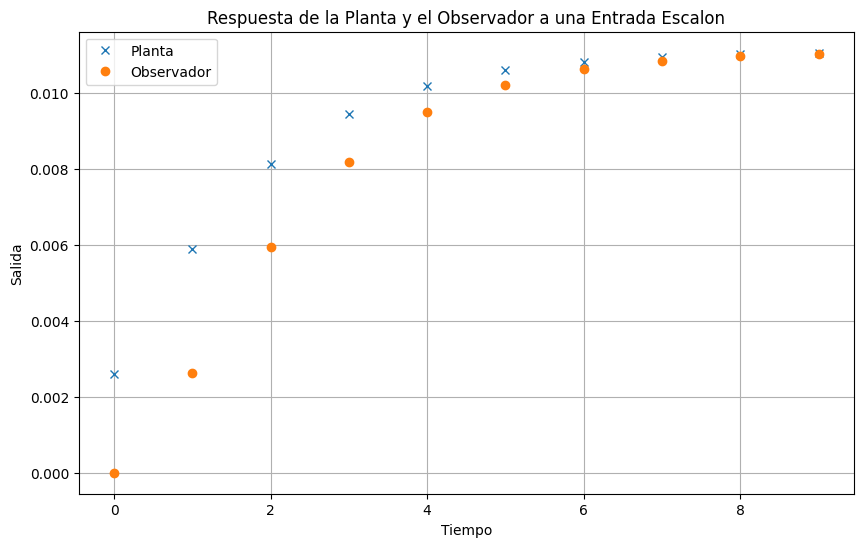

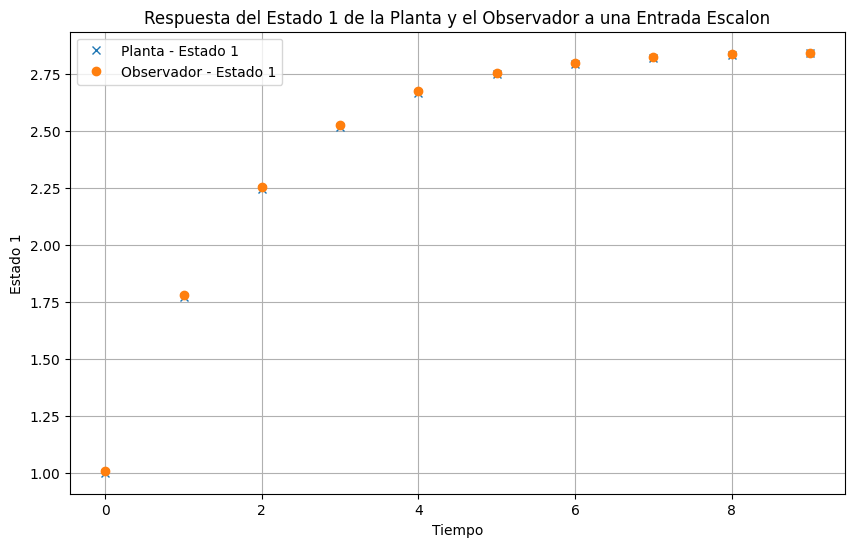

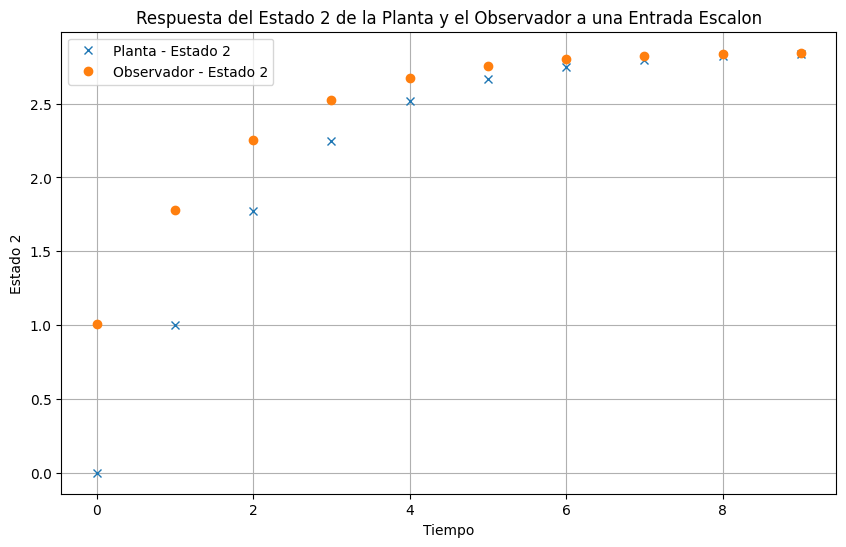

In [ ]:
import matplotlib.pyplot as plt

# Simulación de la planta y el observador
# Suponiendo que tienes las matrices A_d, B_d, C_d, D_d, y observer_gain definidas

# Inicializar el estado de la planta y el observador
x_plant = np.zeros((A_d.shape[0], 1))
x_observer = np.zeros((A_d.shape[0], 1))

# Entrada escalon
u = np.ones((1, 10))

# Crear listas para almacenar los valores de la salida de la planta y el observador
y_plant_list = []
y_observer_list = []
x_plant_list = []  # Lista para almacenar los estados de la planta
x_observer_list = []  # Lista para almacenar los estados del observador

# Simulación
for i in range(10):
    # Simular la planta
    x_plant = A_d @ x_plant + B_d * u[0, i]
    y_plant = C_d @ x_plant + D_d * u[0, i]

    # Simular el observador
    y_observer = C_d @ x_observer
    x_observer = A_d @ x_observer + B_d * u[0, i] + observer_gain * (y_plant - y_observer)

    # Almacenar los valores de la salida de la planta y el observador
    y_plant_list.append(y_plant[0, 0])
    y_observer_list.append(y_observer[0, 0])

    # Almacenar los estados de la planta y el observador
    x_plant_list.append(x_plant.flatten())  # Convertir a una lista 2D
    x_observer_list.append(x_observer.flatten())  # Convertir a una lista 12D

# Graficar los resultados de la salida
plt.figure(figsize=(10, 6))
plt.plot(y_plant_list, 'x', label='Planta')
plt.plot(y_observer_list, 'o', label='Observador')
plt.xlabel('Tiempo')
plt.ylabel('Salida')
plt.title('Respuesta de la Planta y el Observador a una Entrada Escalon')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica para el estado 1
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in x_plant_list], 'x', label='Planta - Estado 1')
plt.plot([x[0] for x in x_observer_list], 'o', label='Observador - Estado 1')
plt.xlabel('Tiempo')
plt.ylabel('Estado 1')
plt.title('Respuesta del Estado 1 de la Planta y el Observador a una Entrada Escalon')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica para el estado 2
plt.figure(figsize=(10, 6))
plt.plot([x[1] for x in x_plant_list], 'x', label='Planta - Estado 2')
plt.plot([x[1] for x in x_observer_list], 'o', label='Observador - Estado 2')
plt.xlabel('Tiempo')
plt.ylabel('Estado 2')
plt.title('Respuesta del Estado 2 de la Planta y el Observador a una Entrada Escalon')
plt.legend()
plt.grid(True)
plt.show()